## Assignment 3: EDA and forecast model

In [1]:
import pandas as pd
#read the data
timeseries_data = pd.read_excel('.\data\Assignment 3 - timeseries_data.xlsx')

#### Check data types and missing values

In [2]:
print(timeseries_data.info())
null_counts = timeseries_data.isnull().sum()
print(null_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14987 entries, 0 to 14986
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   DATETIME                     14987 non-null  datetime64[ns]
 1   HB_NORTH (RTLMP)             14987 non-null  float64       
 2   ERCOT (WIND_RTI)             14982 non-null  float64       
 3   ERCOT (GENERATION_SOLAR_RT)  14983 non-null  float64       
 4   ERCOT (RTLOAD)               14987 non-null  float64       
 5   HOURENDING                   14987 non-null  int64         
 6   MARKETDAY                    14987 non-null  datetime64[ns]
 7   PEAKTYPE                     14987 non-null  object        
 8   MONTH                        14987 non-null  object        
 9   YEAR                         14987 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(2), object(2)
memory usage: 1.1+ MB
None
DATETIME                 

In [3]:
means = timeseries_data.mean(numeric_only=True)

# Fill missing values with the mean of each column
timeseries_data.fillna(means, inplace=True)

#### Descriptive statistics

In [4]:
print(timeseries_data.describe())


       HB_NORTH (RTLMP)  ERCOT (WIND_RTI)  ERCOT (GENERATION_SOLAR_RT)  \
count      14987.000000      14987.000000                 14987.000000   
mean          25.766417       7532.436283                   291.989714   
std           46.361945       3992.218676                   370.865092   
min          -17.860000         54.440000                     0.000000   
25%           18.041250       4138.390000                     0.000000   
50%           20.057500       7283.460000                    22.200000   
75%           25.030000      10851.280000                   608.580000   
max         2809.357500      20350.400000                  1257.540000   

       ERCOT (RTLOAD)    HOURENDING          YEAR  
count    14987.000000  14987.000000  14987.000000  
mean     42371.673703     12.495763   2017.415493  
std       9874.339631      6.922309      0.492823  
min      25566.511248      1.000000   2017.000000  
25%      35431.636526      6.000000   2017.000000  
50%      39934.007113

RTLMP has an extra maximum value, which could indicate an unusually high outlier or a data error. Locational marginal prices can sometimes be negative due to an oversupply of electricity or minimal demand. However, an unexpected maximum value might also suggest data errors or specific market conditions

Similarly, WIND_RTI has an extra minimum value. Like the previous example, this unusually low value could be an outlier or an error.

#### Visualization of RTLMP over time

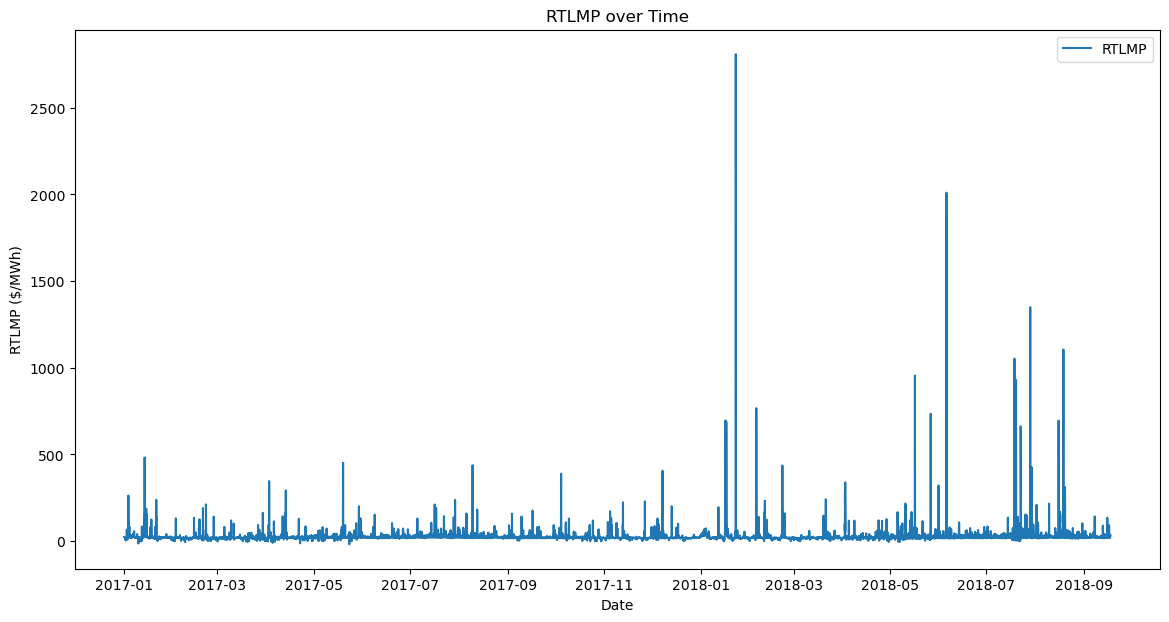

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Visualization of RTLMP over time
plt.figure(figsize=(14, 7))
plt.plot(timeseries_data['DATETIME'], timeseries_data['HB_NORTH (RTLMP)'], label='RTLMP')
plt.title('RTLMP over Time')
plt.xlabel('Date')
plt.ylabel('RTLMP ($/MWh)')
plt.legend()
plt.show()

This graph depicts RTLMP over time. Most of the data points are below  500 USD/MWh. There are several noticeable spikes where the RTLMP reaches particularly high values. The most significant spike occurs around February 2018, where it exceeds 2500 USD/MWh. Other spike occurs around June 2018. These peaks suggest periods of high price volatility, which could be influenced by various factors such as demand decreases, supply shortages, or specific market events

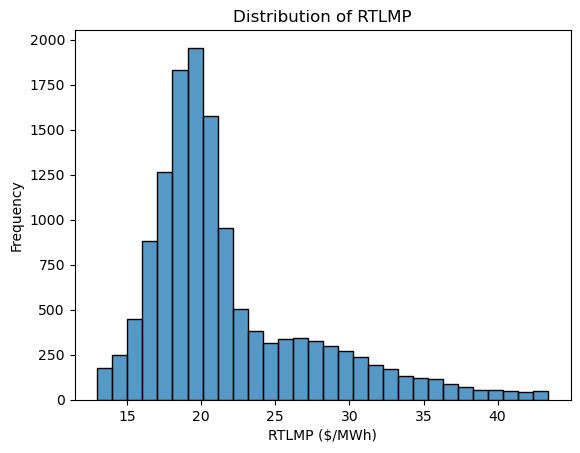

In [6]:
# Distribution of RTLMP

range_l = timeseries_data['HB_NORTH (RTLMP)'].quantile(0.05)
range_r = timeseries_data['HB_NORTH (RTLMP)'].quantile(0.95)

# Plot the histogram with range between 5% and 95%
sns.histplot(timeseries_data['HB_NORTH (RTLMP)'], bins=30,binrange=(range_l, range_r))
plt.title('Distribution of RTLMP')
plt.xlabel('RTLMP ($/MWh)')
plt.ylabel('Frequency')
plt.show()

The histogram displays the distribution of RTLMP values. The distribution shows a right skew. It means that there are a few instances of higher prices while most RTLMP values around the common price range. 

### Feature Engineering

In [7]:
timeseries_data['weekday'] = timeseries_data['DATETIME'].dt.weekday
timeseries_data['hour'] = timeseries_data['DATETIME'].dt.hour
timeseries_data['month'] = timeseries_data['DATETIME'].dt.month
timeseries_data['day'] = timeseries_data['DATETIME'].dt.day
timeseries_data['PEAKTYPE'] = timeseries_data['PEAKTYPE'].map({'OFFPEAK': 0, 'WEPEAK': 1, 'WDPEAK': 2})
timeseries_data.head()


#Adding features like weekday, hour, and month helps capture daily, weekly, and seasonal patterns in RTLMP.
#PeakType is 1 if weekday peak, 0 if offpeak, 2 if weekend peak

,DATETIME,HB_NORTH (RTLMP),ERCOT (WIND_RTI),ERCOT (GENERATION_SOLAR_RT),ERCOT (RTLOAD),HOURENDING,MARKETDAY,PEAKTYPE,MONTH,YEAR,weekday,hour,month,day
0,2017-01-01 01:00:00,23.3575,2155.31,0.0,29485.791355,1,2017-01-01,0,JANUARY,2017,6,1,1,1
1,2017-01-01 02:00:00,21.4650,2313.81,0.0,28911.565913,2,2017-01-01,0,JANUARY,2017,6,2,1,1
2,2017-01-01 03:00:00,20.7350,2587.68,0.0,28238.258175,3,2017-01-01,0,JANUARY,2017,6,3,1,1
3,2017-01-01 04:00:00,20.2700,2748.65,0.0,27821.000513,4,2017-01-01,0,JANUARY,2017,6,4,1,1
4,2017-01-01 05:00:00,20.1200,2757.49,0.0,27646.942413,5,2017-01-01,0,JANUARY,2017,6,5,1,1


C:\Users\02221\AppData\Local\Temp\ipykernel_23936\1983811340.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(timeseries_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')


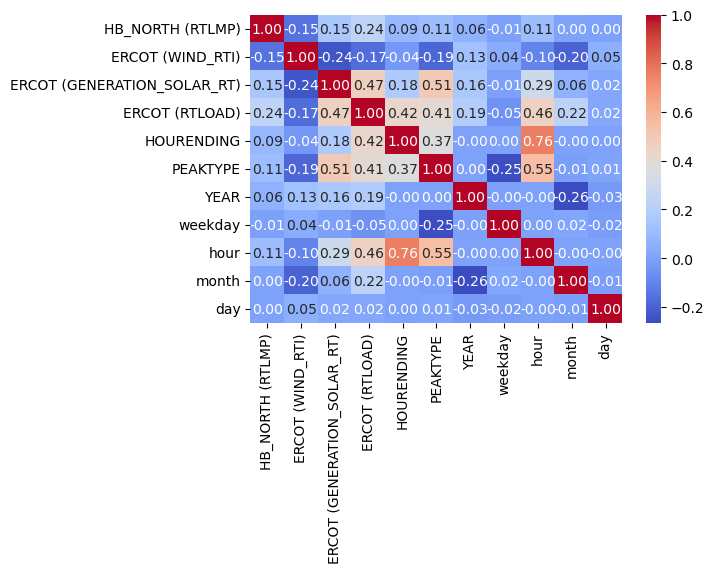

In [8]:
# Correlation matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(timeseries_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

This correlation matrix provides insights into the relationships between the dependent variable (RTLMP) and other variables.

There is a moderate negative correlation (-0.15) between RTLMP and WIND_RTI. This suggests that higher wind energy production might lead to lower locational marginal prices, possibly due to increased supply lowering energy costs. RTLMP shows a positive correlation (0.15) with GENERATION_SOLAR_RT. This could indicate that increased solar power generation corresponds to higher marginal prices. A positive correlation (0.24) exists between RTLMP and RTLOAD, indicating that higher energy demand is associated with higher locational marginal prices; We can find a positive correlation (0.11) between RTLMP and the peak type. On weekday or weekend peak hour, the RTLMP tends to be higher;There is a positive correlation (0.11) between RTLMP and the hour of the day. This implies that RTLMP tends to be higher at certain times of the day. For example energy usage increases during peak demand that leads to higher prices.



### Prediction

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder


X = timeseries_data.drop(['HB_NORTH (RTLMP)','PEAKTYPE', 'MONTH','DATETIME','MARKETDAY'], axis=1)  #independent var
y = timeseries_data['HB_NORTH (RTLMP)']  # dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')  # RMSE


RMSE: 27.807612057627164


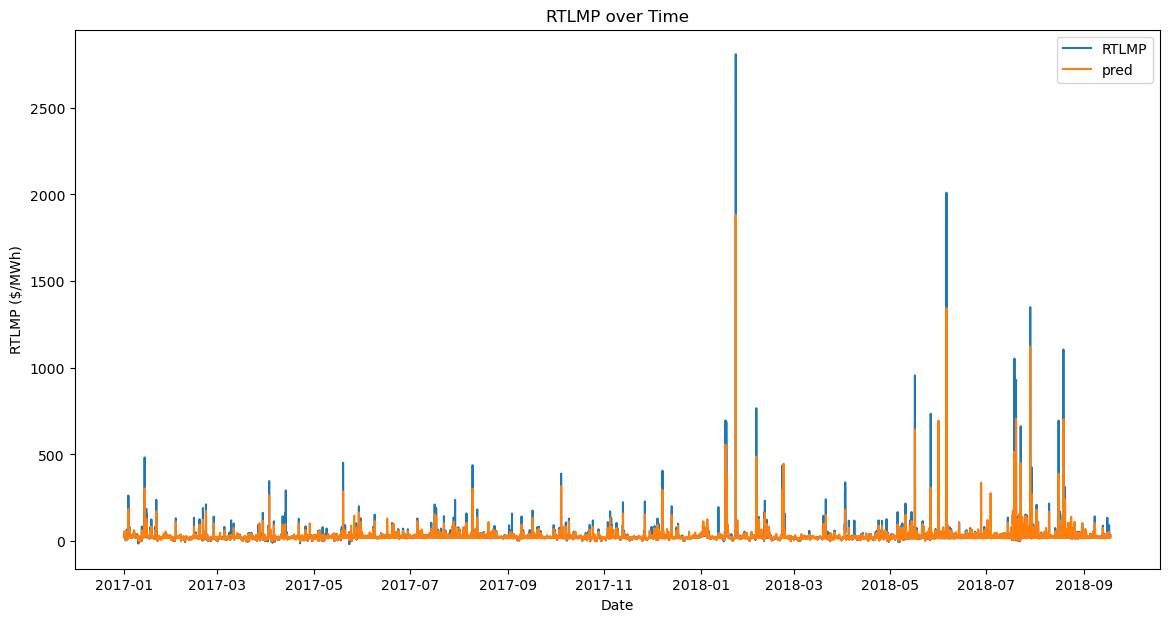

In [10]:
timeseries_data['pred'] = model.predict(X)

# Visualization of RTLMP over time
plt.figure(figsize=(14, 7))
plt.plot(timeseries_data['DATETIME'], timeseries_data['HB_NORTH (RTLMP)'], label='RTLMP')
plt.plot(timeseries_data['DATETIME'], timeseries_data['pred'], label='pred')
plt.title('RTLMP over Time')
plt.xlabel('Date')
plt.ylabel('RTLMP ($/MWh)')
plt.legend()
plt.show()

#### Note:for assignment3, I made an independent python file named forecast.py under the "code" folder